# [Plotting an image with x-axis as time](https://stackoverflow.com/questions/52574000/plotting-an-image-with-x-axis-as-time)

In [10]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# [Dates in the x-axis for a matplotlib plot with imshow](https://stackoverflow.com/questions/23139595/dates-in-the-xaxis-for-a-matplotlib-plot-with-imshow/23142190#23142190)

## create the x-axis: time array

In [2]:
x = [dt.datetime(2018, 9, 30, 0, 0, 0, 0) + dt.timedelta(seconds=(0.028 * 10000 * x)) for x in range(0, 2)]

In [3]:
x

[datetime.datetime(2018, 9, 30, 0, 0),
 datetime.datetime(2018, 9, 30, 0, 4, 40)]

In [4]:
x = mdates.date2num(x)

In [5]:
x

array([736967.        , 736967.00324074])

## create the y-axis:

In [6]:
y = np.random.rand(88, 10000)

In [7]:
y.shape

(88, 10000)

## create plot

### with pyplot

Text(0.5,1,'Tensor Plot')

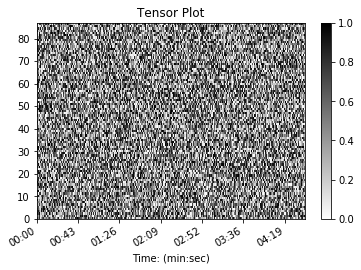

In [14]:
plt.imshow(y, extent=[x[0], x[1], 0, 87], aspect='auto', origin='lower', cmap='gray_r', vmin=0, vmax=1)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
plt.gcf().autofmt_xdate()

plt.colorbar()

plt.xlabel('Time: (min:sec)')
plt.title('Tensor Plot')

### with plt.subplots()

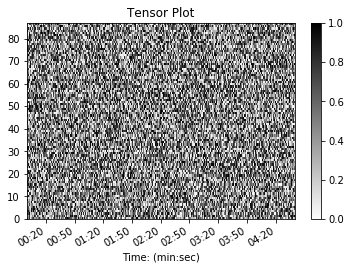

In [15]:
fig, ax = plt.subplots()
im = ax.imshow(y, extent=[x[0], x[1], 0, 87], aspect='auto', origin='lower', cmap='gray_r', vmin=0, vmax=1)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
fig.autofmt_xdate()
fig.colorbar(im, ax=ax)
ax.set_xlabel('Time: (min:sec)')
ax.set_title('Tensor Plot')
plt.show()

# Dates in the x-axis of pyplot.plot

In [16]:
x_time = np.arange(0, (0 + 10000 * 0.028), 0.028)

In [17]:
y = np.random.rand(10000)

In [18]:
x = [dt.timedelta(seconds=x) for x in x_time]

In [19]:
df = pd.DataFrame({'time': x, 'data': y})

In [20]:
df.time = pd.to_datetime(df.time)

In [21]:
df.head()

,time,data
0,1970-01-01 00:00:00.000,0.943810
1,1970-01-01 00:00:00.028,0.062351
2,1970-01-01 00:00:00.056,0.594903
3,1970-01-01 00:00:00.084,0.671273
4,1970-01-01 00:00:00.112,0.395380


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
time    10000 non-null datetime64[ns]
data    10000 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 156.3 KB


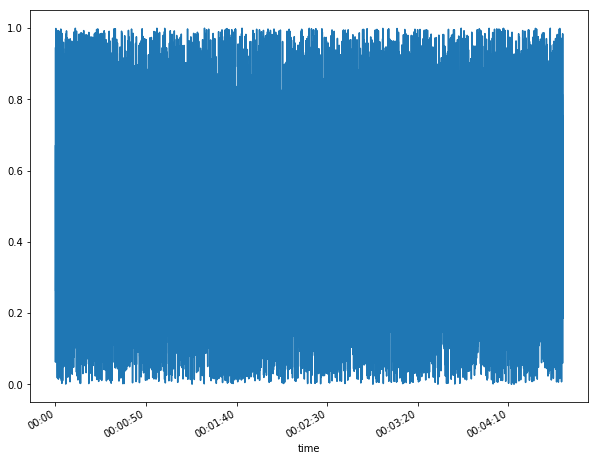

In [26]:
plt.figure(figsize=(10, 8))
plt.plot(df.time.dt.time, df.data)
plt.gcf().autofmt_xdate()
plt.show()